<a href="https://colab.research.google.com/github/0323ali/Machine-Learning/blob/main/CNN%20Model%20train.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This model is trained between **circular images and other images(stars,box,triangle)** and trained on very small data
just taking 10 images of circle
and 10 other images

In [73]:
import tensorflow as tf
import cv2
import os
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [74]:
a=cv2.imread('/content/drive/MyDrive/T/Circle/0.png')
a.shape

(200, 200, 3)

In [75]:
train=ImageDataGenerator(rescale=1/255)
validation=ImageDataGenerator(rescale=1/255)

In [76]:
train_dataset=train.flow_from_directory(
    '/content/drive/MyDrive/T',
    target_size= (200,200),
    batch_size=32,
    class_mode='binary')
validation_dataset=validation.flow_from_directory(
    '/content/drive/MyDrive/T',
    target_size= (200,200),
    batch_size=32,
    class_mode='binary')

Found 20 images belonging to 2 classes.
Found 20 images belonging to 2 classes.


In [77]:
train_dataset.class_indices

{'Circle': 0, 'Other': 1}

In [78]:
train_dataset.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
      dtype=int32)

In [79]:
model=tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16,(3,3),activation='relu',input_shape=(200,200,3)),
    tf.keras.layers.MaxPool2D(2,2),
    tf.keras.layers.Conv2D(32,(3,3),activation='relu',input_shape=(200,200,3)),
    tf.keras.layers.MaxPool2D(2,2),
    tf.keras.layers.Conv2D(64,(3,3),activation='relu',input_shape=(200,200,3)),
    tf.keras.layers.MaxPool2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512,activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid')
])

In [80]:
model.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.001),
              metrics=['accuracy'])

In [81]:
model.fit(train_dataset,
          steps_per_epoch=1,
          epochs=10,
          validation_data=validation_dataset)

Epoch 1/10
1/1 [==============================] - 3s 3s/step - loss: 0.6889 - accuracy: 0.5000 - val_loss: 0.2132 - val_accuracy: 1.0000
Epoch 2/10
1/1 [==============================] - 2s 2s/step - loss: 0.2132 - accuracy: 1.0000 - val_loss: 22.6951 - val_accuracy: 0.5000
Epoch 3/10
1/1 [==============================] - 2s 2s/step - loss: 22.6951 - accuracy: 0.5000 - val_loss: 0.6084 - val_accuracy: 0.5000
Epoch 4/10
1/1 [==============================] - 1s 1s/step - loss: 0.6084 - accuracy: 0.5000 - val_loss: 2.9898 - val_accuracy: 0.5000
Epoch 5/10
1/1 [==============================] - 1s 1s/step - loss: 2.9898 - accuracy: 0.5000 - val_loss: 0.0847 - val_accuracy: 1.0000
Epoch 6/10
1/1 [==============================] - 1s 1s/step - loss: 0.0847 - accuracy: 1.0000 - val_loss: 0.1082 - val_accuracy: 1.0000
Epoch 7/10
1/1 [==============================] - 1s 1s/step - loss: 0.1082 - accuracy: 1.0000 - val_loss: 0.0389 - val_accuracy: 1.0000
Epoch 8/10
1/1 [=======================

1/1 [==============================] - 0s 102ms/step
Prediction: [[0.00662564]]
Circle image


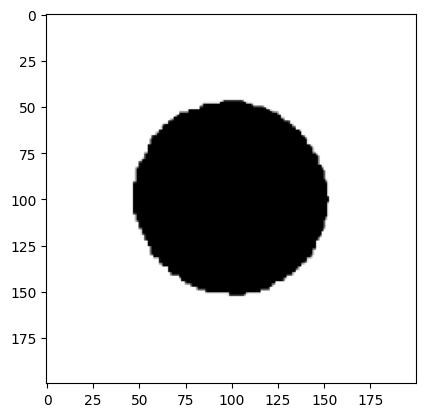

In [82]:
img_path = '/content/drive/MyDrive/T/Circle/0.png'
img = image.load_img(img_path, target_size=(200, 200))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
img_array /= 255.0  # Normalize to [0, 1]
img_array = load_and_preprocess_image(img_path)
prediction = model.predict(img_array)
print("Prediction:", prediction)
pic=cv2.imread(img_path)
plt.imshow(pic)

if prediction[0] > 0.5:
    print("Other image")
else:
    print("Circle image")